# Remaining tasks @ https://github.com/cursed-0men/Machine-Learning/tree/main/4.ML%20first%20model

Linear Regression ->


*   Least Square Method
*   Optimized Gradient Descent



# Gradient Descent Method

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
# feature and target
x = df['BloodPressure'].values
y = df['SkinThickness'].values

# standardising the data
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

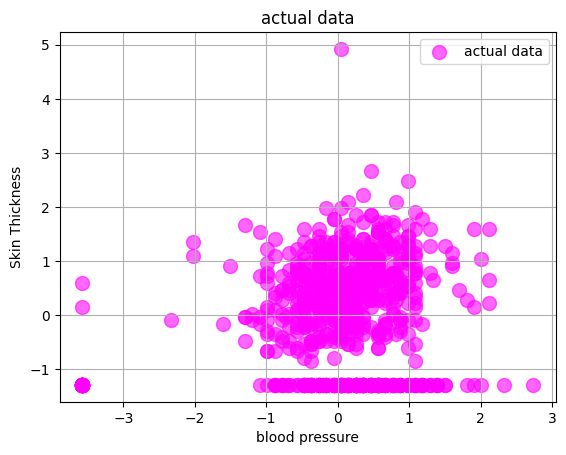

In [66]:
# the existing data plot
plt.scatter(x,y,s = 100, color = 'magenta',alpha = 0.6, label = 'actual data')
plt.xlabel('blood pressure')
plt.ylabel('Skin Thickness')
plt.title('actual data')
plt.legend()
plt.grid()
plt.show()

In [69]:
# hyperparameters
lr = 0.001
steps = 1000
n = len(x)
# slope and intercept
m = 0
b = 0
# loss at each step
residual_list = []

In [70]:
# gradient descent loop
for i in range(steps):
  y_pred = m*x + b
  residual = y - y_pred

  # loss
  loss = (1/n)*np.sum(residual ** 2)
  residual_list.append(loss)
  # gradients
  dm = (-2/n)*np.sum(x * residual)
  db = (-2/n)*np.sum(residual)
  # updating the weights
  m = m - (lr * dm)
  b = b - (lr * db)

  print(f'step {i} | intercept:{b} | slope:{m} | loss:{loss}')

step 0 | intercept:2.0122792321330963e-19 | slope:0.0004147410768061417 | loss:0.9999999999999997
step 1 | intercept:4.1170770496516223e-19 | slope:0.000828652671458671 | loss:0.9998281618493701
step 2 | intercept:6.083096989092004e-19 | slope:0.0012417364429218954 | loss:0.9996570103639906
step 3 | intercept:7.979727989493313e-19 | slope:0.0016539940468421933 | loss:0.9994865427999465
step 4 | intercept:9.876358989894622e-19 | slope:0.0020654271355546507 | loss:0.9993167564242882
step 5 | intercept:1.1888638222027718e-18 | slope:0.0024760373580896833 | loss:0.9991476485149875
step 6 | intercept:1.420160285666346e-18 | slope:0.0028858263601796454 | loss:0.9989792163608919
step 7 | intercept:1.6167622796103841e-18 | slope:0.003294795784265428 | loss:0.9988114572616844
step 8 | intercept:1.8364939199007797e-18 | slope:0.0037029472695030386 | loss:0.998644368527837
step 9 | intercept:2.040034807748725e-18 | slope:0.004110282451770174 | loss:0.9984779474805704
step 10 | intercept:2.2482016

In [71]:
# final slope and intercept
print('final slope :',round(m,3))
print('final intercept :',round(b,3))

final slope : 0.179
final intercept : 0.0


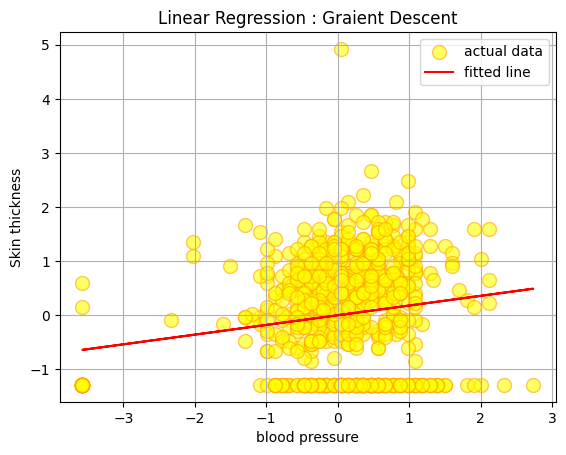

In [73]:
# the plot
plt.scatter(x,y,s = 100, color = 'yellow',alpha = 0.6, label = 'actual data',edgecolor = 'orange')
plt.plot(x,y_pred,color = 'red',label = 'fitted line')
plt.xlabel('blood pressure')
plt.ylabel('Skin thickness')
plt.title('Linear Regression : Graient Descent')
plt.grid(True)
plt.legend()
plt.show()

In [74]:
# prediction on training data
y_pred = m*x + b
y_pred

array([ 0.02683988, -0.02879583, -0.04734107, -0.02879583, -0.26988392,
        0.04538512, -0.17715773, -0.64078867,  0.00829465,  0.24938274,
        0.21229226,  0.04538512,  0.10102084, -0.08443154,  0.02683988,
       -0.64078867,  0.13811131,  0.04538512, -0.36261011,  0.00829465,
        0.17520179,  0.13811131,  0.19374702,  0.10102084,  0.2308375 ,
        0.00829465,  0.06393036, -0.02879583,  0.11956607,  0.21229226,
        0.05465774,  0.06393036, -0.10297678,  0.21229226,  0.0824756 ,
       -0.08443154,  0.06393036,  0.06393036, -0.01025059,  0.02683988,
       -0.04734107,  0.13811131,  0.21229226,  0.3791994 , -0.04734107,
       -0.02879583, -0.12152202,  0.00829465, -0.02879583, -0.64078867,
        0.10102084, -0.17715773, -0.02879583,  0.19374702, -0.02879583,
       -0.17715773, -0.01025059,  0.17520179,  0.11956607, -0.04734107,
       -0.64078867,  0.02683988, -0.0658863 , -0.10297678, -0.02879583,
        0.04538512,  0.17520179,  0.21229226, -0.02879583,  0.14

/tmp/ipython-input-75-4281070924.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


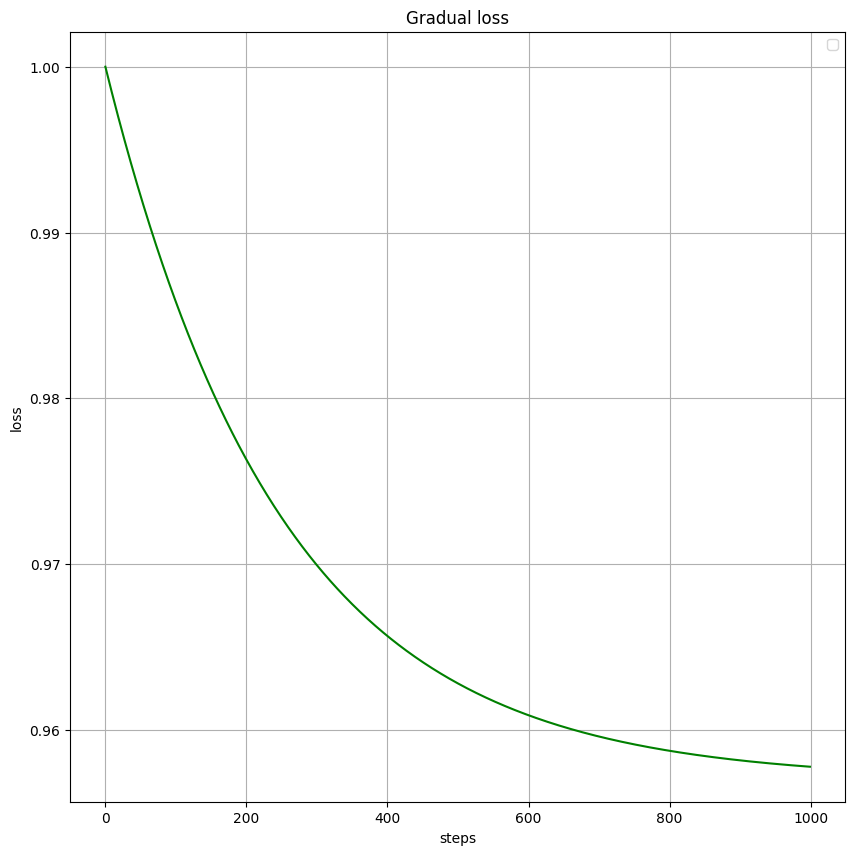

In [75]:
# loss curve
plt.figure(figsize=(10,10))
plt.plot(range(steps),residual_list,color = 'green')
plt.xlabel('steps')
plt.ylabel('loss')
plt.title('Gradual loss')
plt.legend()
plt.grid(True)
plt.show()